In [1]:
import pandas as pd
df=pd.read_csv("Tablets.csv")

In [2]:
df

,Brand,Color,Ram,Rom,Screen_size,Battery,Megapixel,Rating,price
0,MOTOROLA,Modernist Teal,6.0,128,11.00,7700.0,13,4.3,"₹22,990"
1,SAMSUNG,Silver,3.0,32,8.70,5100.0,8,4.3,"₹11,999"
2,SAMSUNG,Blue,4.0,128,10.40,7040.0,8,4.5,"₹31,999"
3,Lenovo,Abyss Blue,4.0,128,10.61,7700.0,13,4.2,"₹24,490"
4,SAMSUNG,Beige,12.0,256,14.60,10090.0,13,NaN,"₹1,08,999"
...,...,...,...,...,...,...,...,...,...
475,APPLE,Silver,NaN,128,11.00,NaN,12,4.6,"₹79,900"
476,Lenovo,NaN,4.0,128,10.30,5000.0,8,4.3,"₹15,999"
477,SAMSUNG,Silver,6.0,128,12.40,10090.0,8,4.5,"₹49,999"
478,APPLE,Space Grey,NaN,256,10.90,NaN,12,4.6,"₹81,400"


In [3]:
df.info() # getting all info about features(columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        480 non-null    object 
 1   Color        452 non-null    object 
 2   Ram          315 non-null    float64
 3   Rom          480 non-null    int64  
 4   Screen_size  480 non-null    float64
 5   Battery      307 non-null    float64
 6   Megapixel    480 non-null    int64  
 7   Rating       449 non-null    float64
 8   price        480 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 33.9+ KB


In [4]:
df.isnull().sum()

Brand            0
Color           28
Ram            165
Rom              0
Screen_size      0
Battery        173
Megapixel        0
Rating          31
price            0
dtype: int64

### DATA CLEANING

In [5]:
### Color
df["Color"].mode()

0    Silver
Name: Color, dtype: object

In [6]:
df["Color"]=df["Color"].fillna(df["Color"].mode()[0]) # filling nll values with mode for categorical

In [7]:
### Ram
df["Ram"].mean()

6.025396825396825

In [8]:
df["Ram"].median()

4.0

In [9]:
df["Ram"].mode()

0    4.0
Name: Ram, dtype: float64

In [10]:
df["Ram"]=df["Ram"].fillna(df["Ram"].median()).astype("float").astype("int")

In [11]:
### Battery
df["Battery"].mode()

0    10090.0
Name: Battery, dtype: float64

In [12]:
df["Battery"]=df["Battery"].fillna(df["Battery"].mode()[0]).astype("float").astype("int")

In [13]:
### Price
df["price"]=df["price"].str.replace("₹","")
df["price"]=df["price"].str.replace(",","")

In [14]:
df["price"]

0       22990
1       11999
2       31999
3       24490
4      108999
        ...  
475     79900
476     15999
477     49999
478     81400
479     16490
Name: price, Length: 480, dtype: object

In [15]:
df["price"]=df["price"].astype("int")

In [16]:
### Rating
df["Rating"].mean()

4.4349665924276165

In [17]:
df["Rating"].median()

4.5

In [18]:
df["Rating"].mode()

0    4.6
Name: Rating, dtype: float64

In [19]:
df["Rating"]=df["Rating"].fillna(df["Rating"].mode()[0]).astype("float").astype("int")

#### Outliers

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

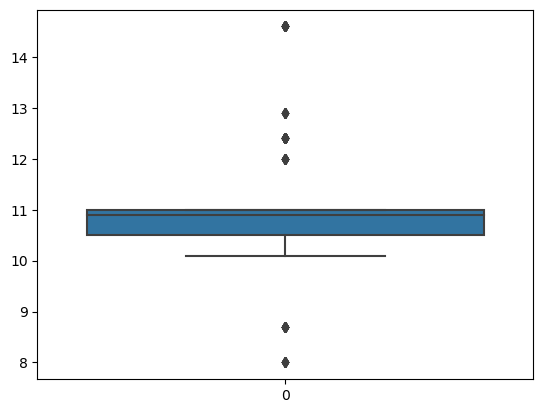

In [21]:
### Screen_size
sns.boxplot(df["Screen_size"])

In [22]:
## Screen size
Q1= df['Screen_size'].quantile(0.25)  
Q3 = df['Screen_size'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
IQR

0.5

In [24]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
print(lower_bound) 
print(upper_bound)

9.75
11.75


In [26]:
df = df[(df["Screen_size"] >= lower_bound) & (df["Screen_size"] <= upper_bound)]

<Axes: >

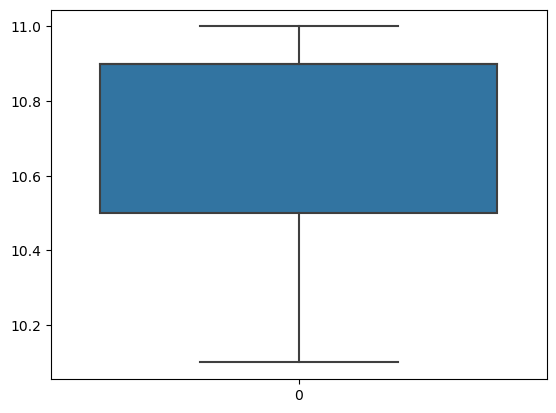

In [27]:
sns.boxplot(df["Screen_size"])

<Axes: >

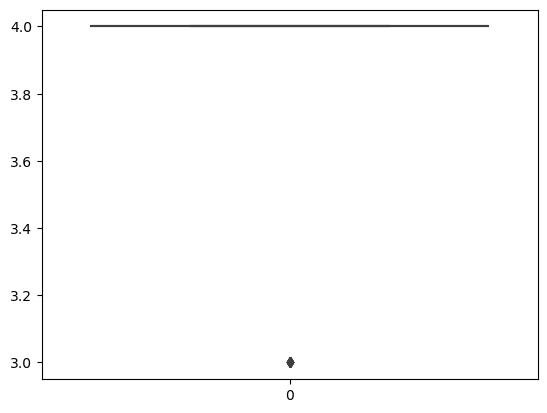

In [28]:
### Rating
sns.boxplot(df["Rating"])

In [29]:
## Rating
Q1= df['Rating'].quantile(0.25)  
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
IQR

0.0

In [31]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [32]:
lower_bound 
upper_bound

4.0

In [33]:
df = df[(df["Rating"] >= lower_bound) & (df["Rating"] <= upper_bound)]

<Axes: >

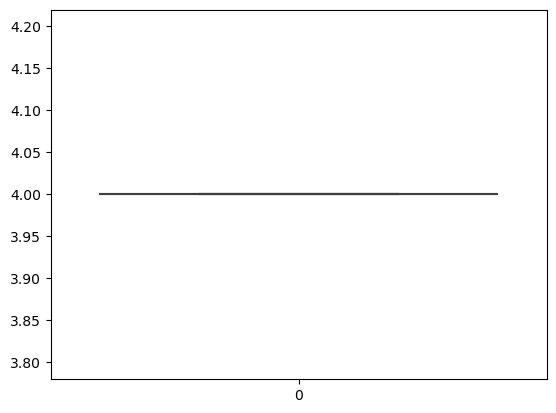

In [34]:
sns.boxplot(df["Rating"])

In [35]:
df

,Brand,Color,Ram,Rom,Screen_size,Battery,Megapixel,Rating,price
0,MOTOROLA,Modernist Teal,6,128,11.00,7700,13,4,22990
2,SAMSUNG,Blue,4,128,10.40,7040,8,4,31999
3,Lenovo,Abyss Blue,4,128,10.61,7700,13,4,24490
5,APPLE,Star Light,4,64,10.90,10090,12,4,54900
6,APPLE,Star Light,4,256,10.90,10090,12,4,68400
...,...,...,...,...,...,...,...,...,...
474,Lenovo,Silver,4,128,10.10,7000,8,4,19999
475,APPLE,Silver,4,128,11.00,10090,12,4,79900
476,Lenovo,Silver,4,128,10.30,5000,8,4,15999
478,APPLE,Space Grey,4,256,10.90,10090,12,4,81400


In [36]:
df.isnull().sum()

Brand          0
Color          0
Ram            0
Rom            0
Screen_size    0
Battery        0
Megapixel      0
Rating         0
price          0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 479
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        326 non-null    object 
 1   Color        326 non-null    object 
 2   Ram          326 non-null    int32  
 3   Rom          326 non-null    int64  
 4   Screen_size  326 non-null    float64
 5   Battery      326 non-null    int32  
 6   Megapixel    326 non-null    int64  
 7   Rating       326 non-null    int32  
 8   price        326 non-null    int32  
dtypes: float64(1), int32(4), int64(2), object(2)
memory usage: 28.5+ KB


In [38]:
df.isna().sum()

Brand          0
Color          0
Ram            0
Rom            0
Screen_size    0
Battery        0
Megapixel      0
Rating         0
price          0
dtype: int64

### DATA VISUALIZATION

#### UNIVARIATE-CATEGORICAL

### Q1.What is the market distribution of various tablets brands.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df["Brand"].value_counts()

APPLE       156
MOTOROLA     62
SAMSUNG      60
Lenovo       40
Nokia         8
Name: Brand, dtype: int64

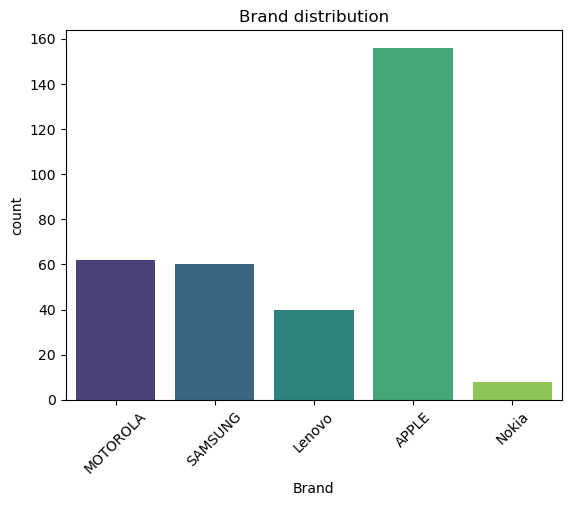

In [41]:
plt.xlabel("Brand")
plt.title("Brand distribution")
sns.countplot(x="Brand",data=df,palette="viridis")
plt.xticks(rotation=45)
plt.show()

- This code aims to visually represent the distribution of Tablets brands in the dataset using a count plot. This type of plot is useful for understanding the frequency or count of each category (brand) in the dataset, providing a quick overview of the brand distribution.

- The top count of brand is apple.

#### UNIVARIATE-CONTINUOUS

### Q2.What is the distribution of tablets prices. 

In [42]:
df["price"].value_counts()

68400    43
81400    28
18999    20
44999    20
56340    20
18490    20
16490    19
54900    19
15999    19
31999    12
22990    12
24490    12
96999    11
19990    11
79900     9
19999     9
32892     9
90090     9
72999     8
16999     8
57490     8
Name: price, dtype: int64

In [43]:
df["price"].median()

44999.0

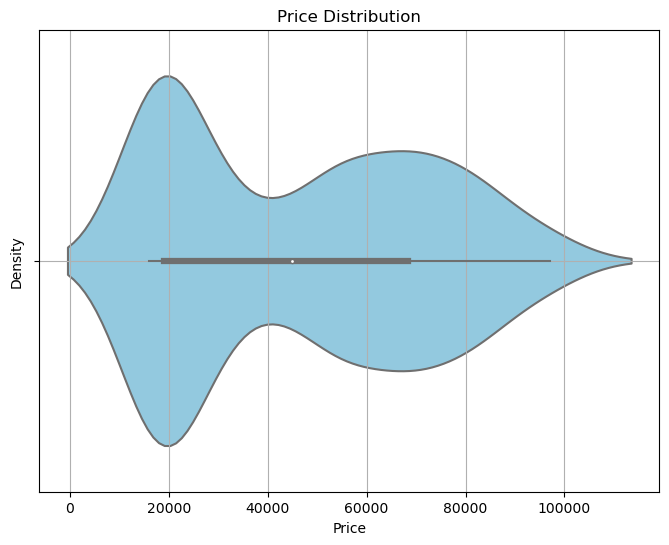

In [44]:
plt.figure(figsize=(8, 6))  
sns.violinplot(x=df["price"],bins=10, color="skyblue")  

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Density")
plt.grid()
plt.show()

- The plot is to provide a visual representation of the distribution of tablet prices using a violin plot. Violin plots are useful for showing the distribution of data, including information about central tendency and density. This plot helps to understand the spread of prices and identify potential patterns or clusters in the dataset.


- From this, I have analysed that,the distribution of prices  are more around 20000.

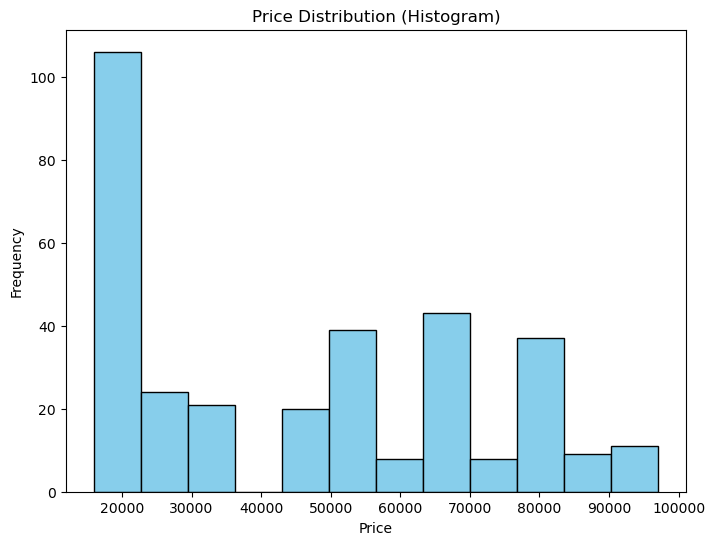

In [45]:
### Histogram
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(df["price"], bins=12, color='skyblue', edgecolor='black')  # You can adjust the number of bins

plt.title("Price Distribution (Histogram)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

- The code provide a visual representation of the distribution of tablets prices using a histogram. Histograms are effective for displaying the frequency or count of data points within specified bins, allowing for insights into the central tendency and spread of the data.

- From plot,the more prices are around 20000 and there is no tabs at 40000 price.

#### BIVARIATE 

#### Categorical and Continuous

### Q3.Which tablets brand, based on the mean ratings, appears to have the highest customer satisfaction?

In [46]:
df.groupby(by="Brand")[["Rating"]].mean()

,Rating
Brand,
APPLE,4.0
Lenovo,4.0
MOTOROLA,4.0
Nokia,4.0
SAMSUNG,4.0


In [47]:
df["Brand"].unique()

array(['MOTOROLA', 'SAMSUNG', 'Lenovo', 'APPLE', 'Nokia'], dtype=object)

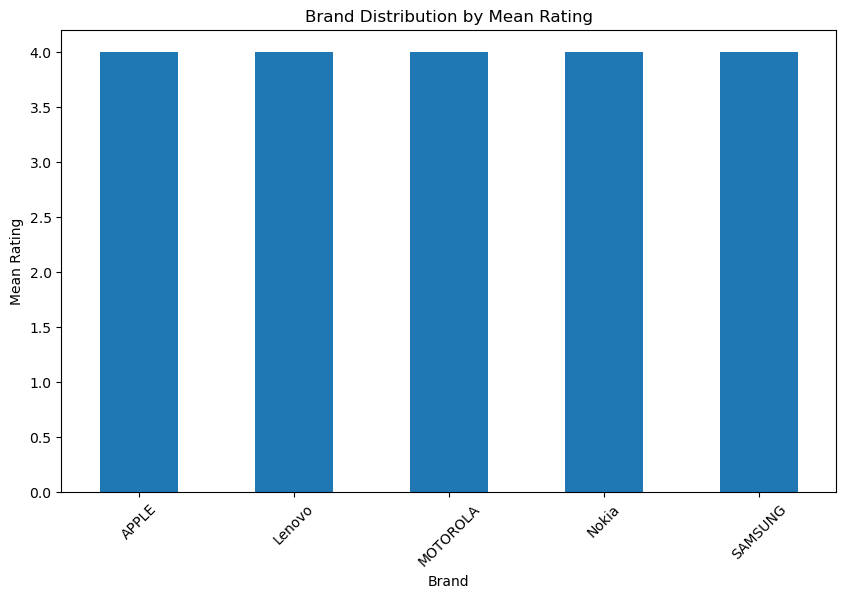

In [48]:
# Group data by brand and calculating the mean rating
brand_rating_mean = df.groupby("Brand")["Rating"].mean()

# Plot the data
plt.figure(figsize=(10, 6))
brand_rating_mean.plot(kind="bar")
plt.xlabel("Brand")
plt.ylabel("Mean Rating")
plt.title("Brand Distribution by Mean Rating")
plt.xticks(rotation=45)

# Show the plot
plt.show()

- The code tells to visually represent the mean ratings of different brands using a bar plot. This type of plot is useful for comparing the average ratings of brands, allowing for insights into customer satisfaction or perception.

- The mean rating of brands is all are equal.

#### Continuous and Continuous

### Q4.What is the spread of tablets prices accordingtheir battery capacities?"

In [49]:
df["Ram"].value_counts()

4     275
3      20
6      12
12     11
8       8
Name: Ram, dtype: int64

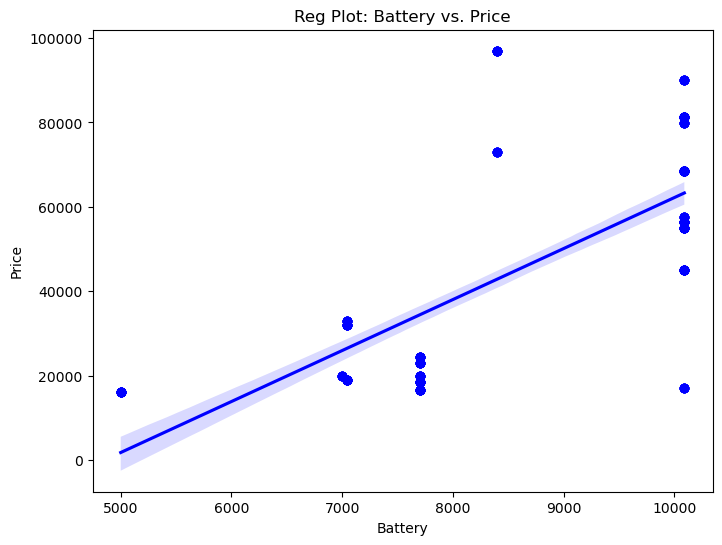

In [50]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Battery', y="price", data=df, color='blue')
plt.title('Reg Plot: Battery vs. Price')
plt.xlabel("Battery")
plt.ylabel("Price")

# Show the plot
plt.show()

- The plot  visually represent the linear relationship between the 'Battery' and 'Price' columns using a regression plot. The plot provides insights into how changes in the battery capacity may be associated with changes in the price of tablets.

- The distribution of batteries are more around 20000.

### Q5.Calculate a relationship between features of Tablets by heatmap.

C:\Users\aksha\AppData\Local\Temp\ipykernel_7416\441662829.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


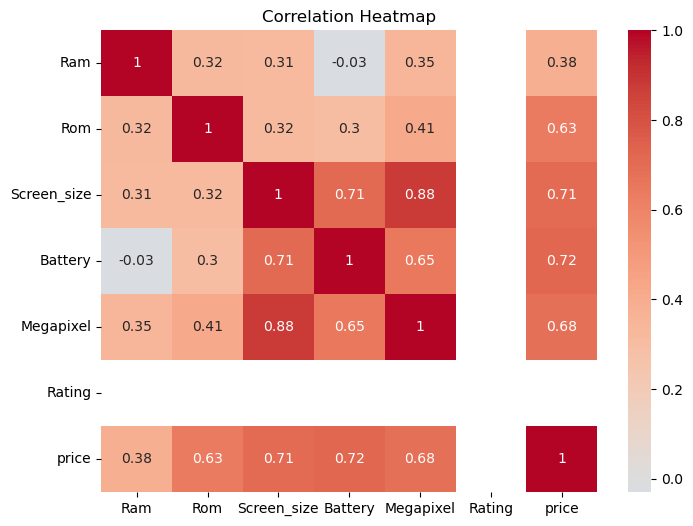

In [51]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')


# Show the plot
plt.show()

- It tells to provide a visual representation of the correlation structure among numerical columns in the dataset. The correlation heatmap helps identify patterns and strengths of relationships between variables.

#### Categorical and Categorical

### Q6.How does the average price of tablets vary across different brands and colors?  

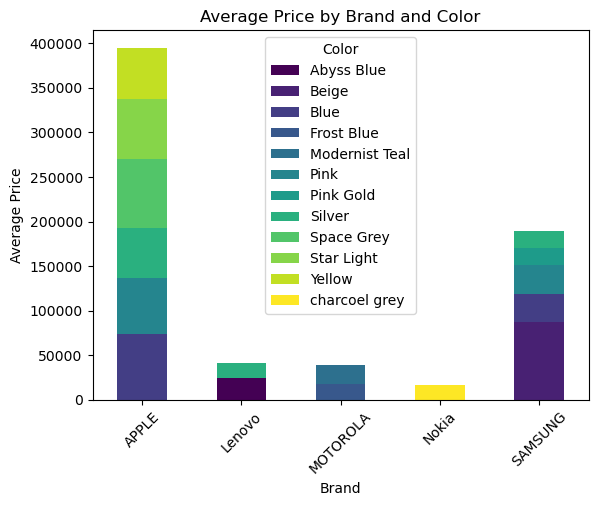

In [52]:
cross_tab = pd.crosstab(index=df['Brand'],columns=df['Color'], values=df['price'],aggfunc="mean")
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Average Price by Brand and Color")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45) 
plt.show()

- The plot is used  to visually represent the average prices  by brand and color using a stacked bar plot. This type of plot provides insights into how the average price varies across different combinations of brand and color.

- The average prices according to brand and color of tabs is "samsung" of color "beige" around the average prices 50000. 

### Multivariate

#### Categorical and Continuous

### Q7.How does the average price and RAM capacity vary across different tab brands?

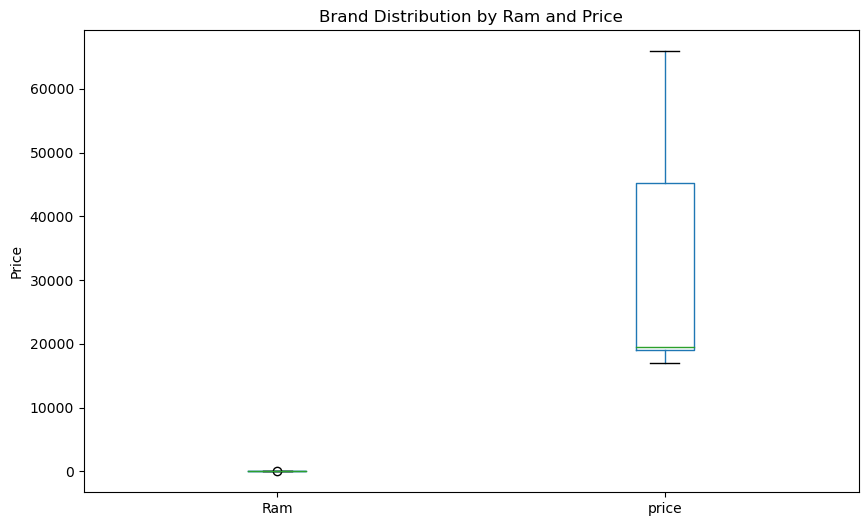

In [53]:
pivot_table = pd.pivot_table(df, values=["price","Ram"], index='Brand', aggfunc='mean')

# Plot box plots based on the pivot table
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the box plots
pivot_table.boxplot(grid=False)
plt.title("Brand Distribution by Ram and Price")
plt.ylabel("Price")

plt.show()

- The code aims to provide a visual representation of the distribution of average prices and RAM capacities across different brands using a box plot. This type of plot is effective for comparing the central tendency, spread, and potential outliers in these numerical features within each brand.

- There is slight distribution of ram according to different and there is more 20000 price distribution according to different brands.

### Q8."Which brands in the dataset have received 5-star ratings, and what are their respective counts.

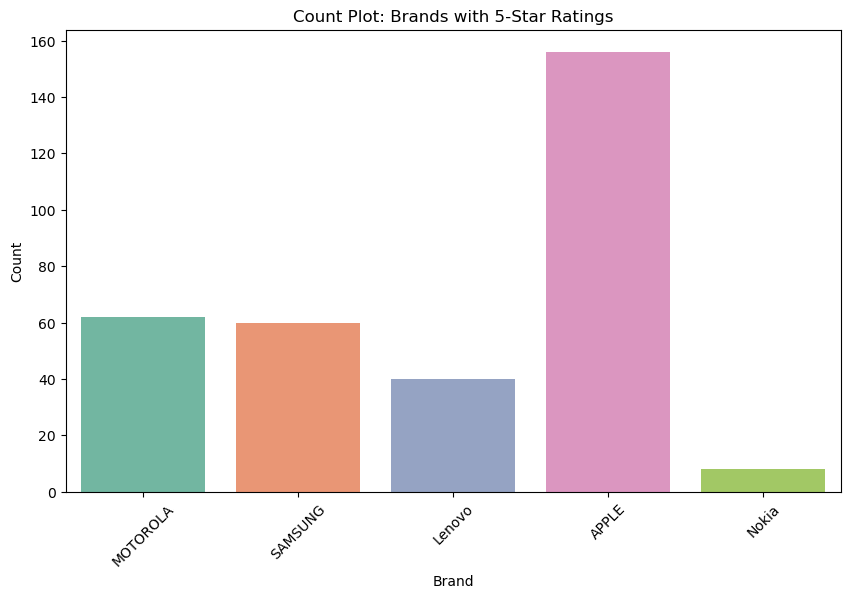

In [54]:
five_star_df = df[df['Rating'] == 4.0]

# Create a count plot to visualize the brands with 5-star ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=five_star_df, palette='Set2')
plt.title('Count Plot: Brands with 5-Star Ratings')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

- The code aims to visualize the distribution of 5-star ratings among different brands using a count plot. This type of plot provides insights into which brands have a higher frequency of top ratings in the dataset.

- The top brand is apple and the second brand is motorola which have  high rating of 4.0

### Q9."How do the average prices and battery capacities vary across different Tab brands?

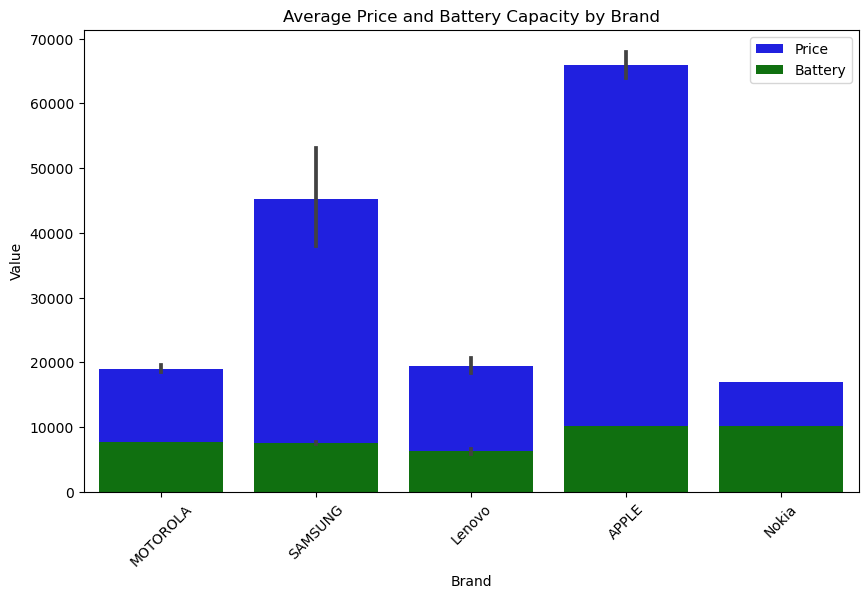

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='price', data=df, color='blue', label='Price')
sns.barplot(x='Brand', y='Battery', data=df, color='green', label='Battery')
plt.title('Average Price and Battery Capacity by Brand')
plt.xlabel('Brand')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

- It visually compare the average price and battery capacity of different brands using a grouped bar plot. This type of plot allows for easy comparison of two numerical values across different categories.

- The top brand is apple according to battery and averrage price distribution.

#### Continuous and Continuous

### Q10."How do Ram, Rom, and Price correlate with each other across different tablets?

<Figure size 800x600 with 0 Axes>

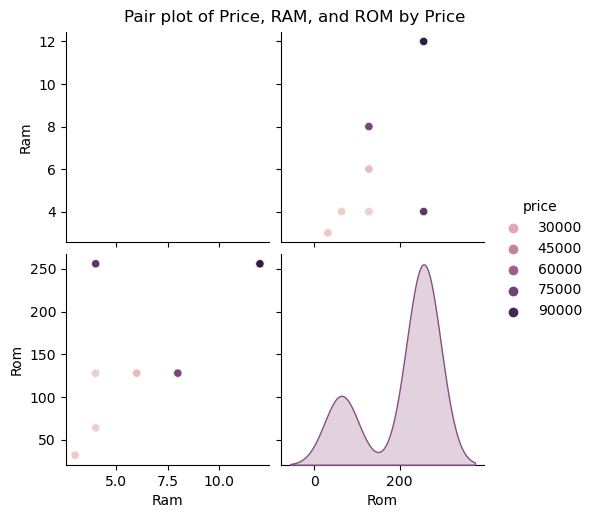

In [56]:
# Plot scatter plot matrix grouped by 'Brand'
plt.figure(figsize=(8, 6))
sns.pairplot(data=df, hue='price', vars=["Ram", "Rom"])
plt.suptitle('Pair plot of Price, RAM, and ROM by Price',y=1.02)
plt.show()

- It is  to provide a visual exploration of the relationships between 'Price', 'Ram', and 'Rom' variables. The pair plot is particularly useful for identifying patterns, correlations, and potential trends in the data.

##### There are no multiple categorical columns

## CONCLUSION
##### From this analyis,I can say that the preferable brand to buy according to features is apple.The second brand which is more preferable to buy for customers accoding to features is Samsung.